In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("./data/kidney_disease.csv")

In [92]:
df.drop("id", axis=1, inplace=True)

In [93]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [94]:
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"], errors="coerce")
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"], errors="coerce")
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"], errors="coerce")

In [95]:
cat_columns = [col for col in df.columns if df[col].dtype =="object"]
num_columns = [col for col in df.columns if df[col].dtype !="object"]

In [96]:
for col in cat_columns:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [97]:
df["diabetes_mellitus"].replace(to_replace={"\tno":"no" , "\tyes":"yes", " yes":"yes"}, inplace=True)
df["coronary_artery_disease"]= df["coronary_artery_disease"].replace("\tno", value="no")
df["class"] = df["class"].replace(to_replace={"ckd\t":"ckd", "not ckd":"not ckd"})

C:\Users\baxti\AppData\Local\Temp\ipykernel_3396\3675774127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["diabetes_mellitus"].replace(to_replace={"\tno":"no" , "\tyes":"yes", " yes":"yes"}, inplace=True)


In [98]:
unique_columns = ["diabetes_mellitus","coronary_artery_disease","class"]

for col in unique_columns:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'notckd']


In [100]:
df["class"] = df["class"].map({"ckd": 1, "notckd": 0})

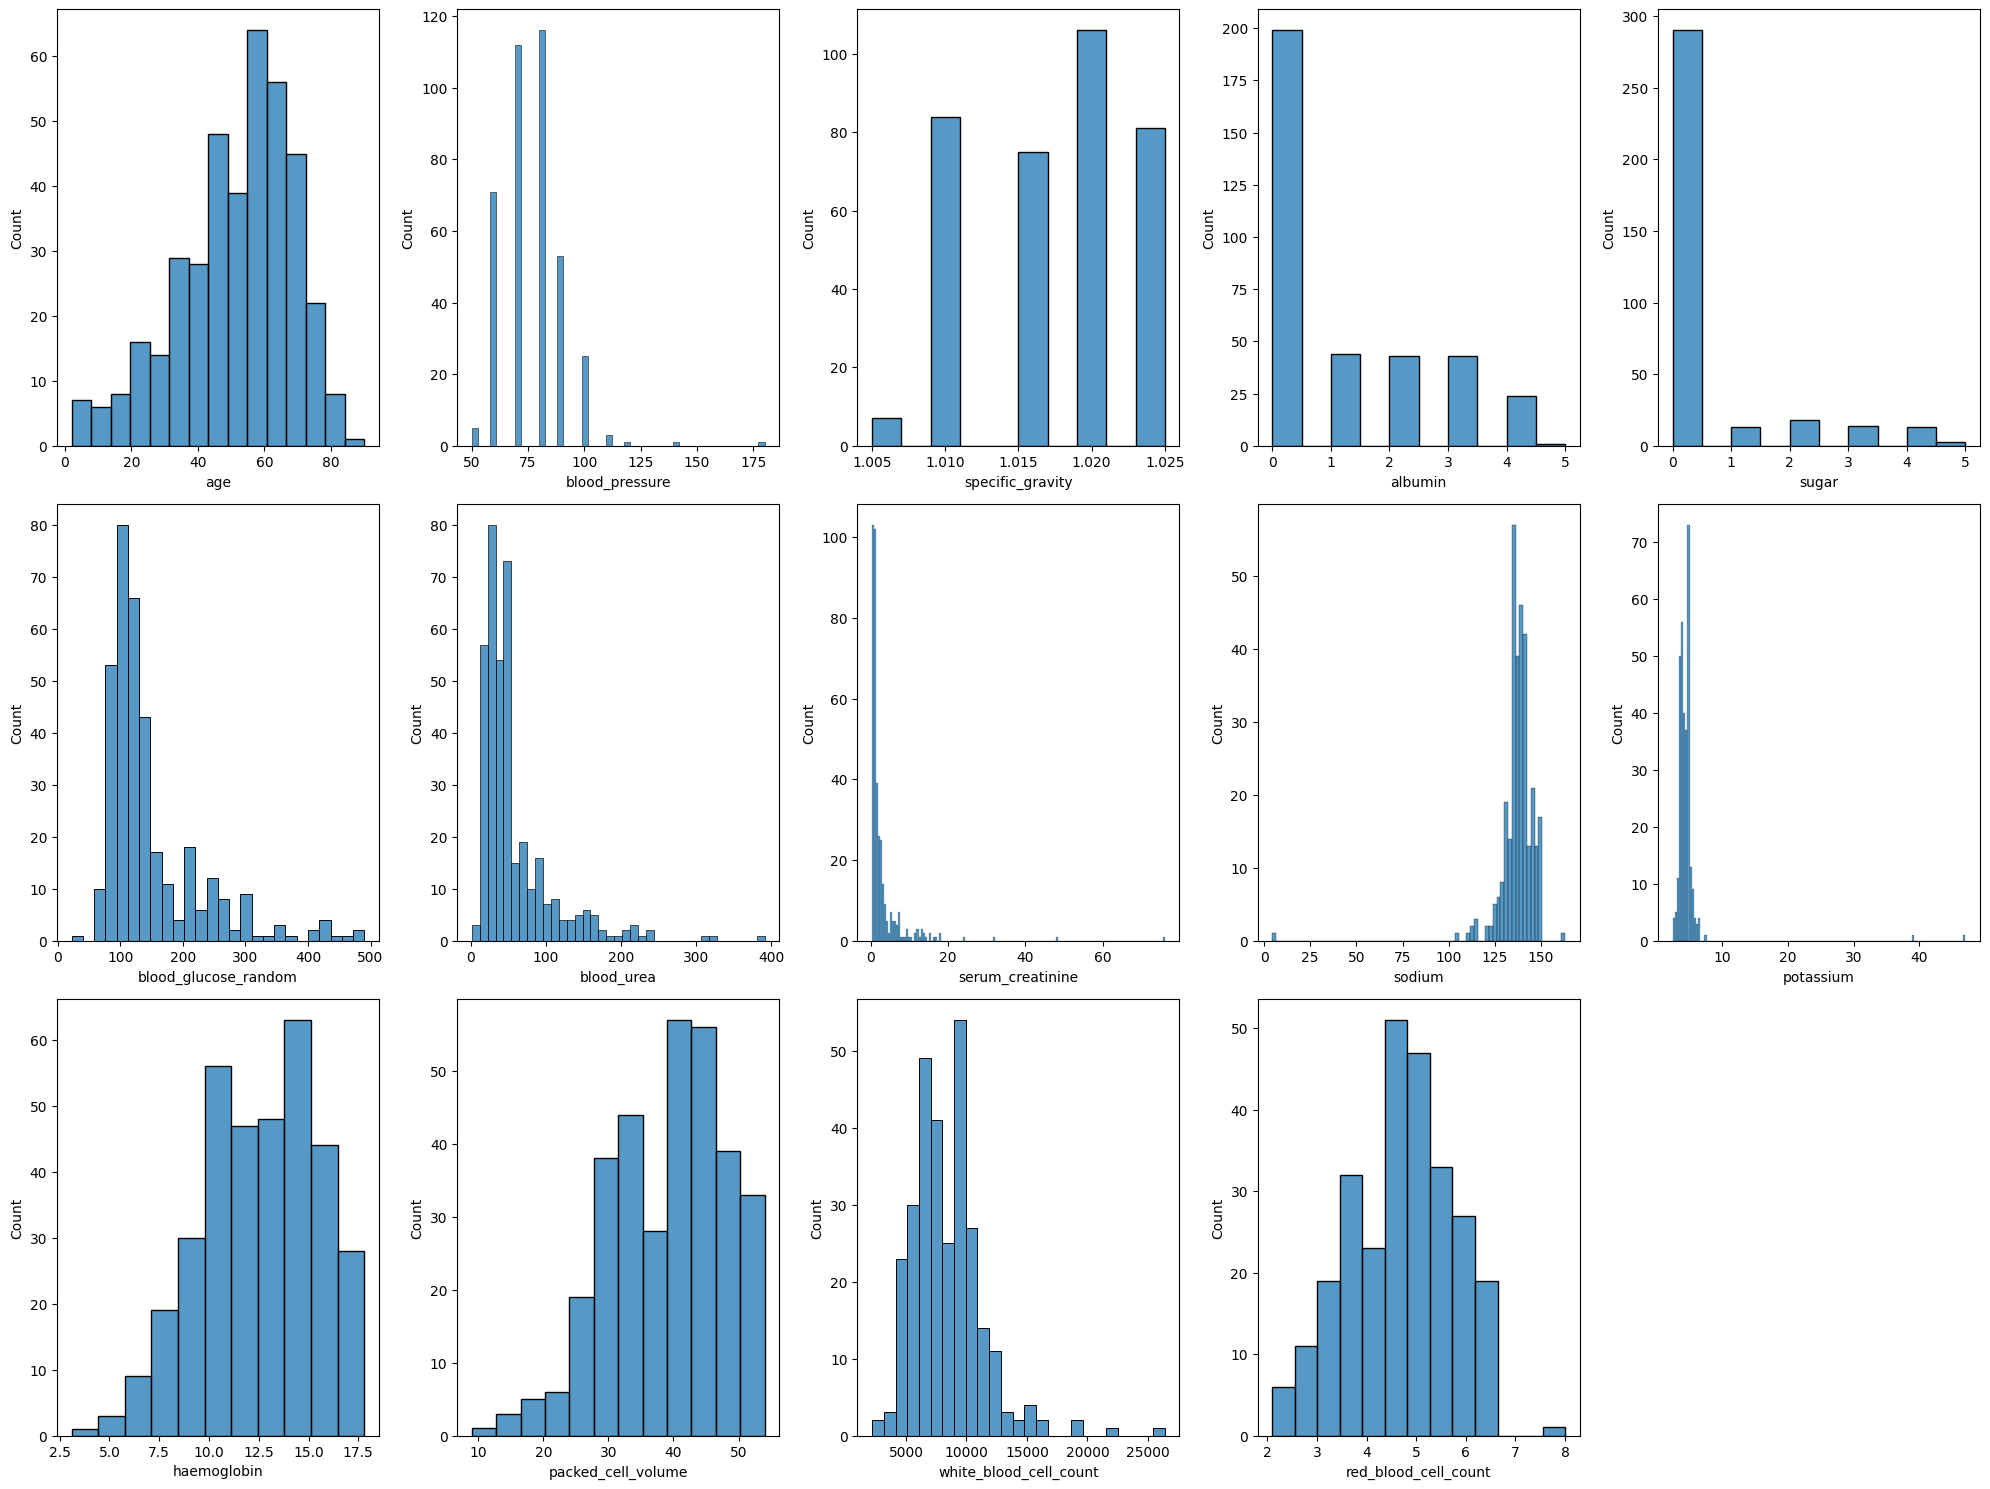

In [101]:
plt.figure(figsize=(20, 15))
plot_number = 1

for col in num_columns:
    if plot_number <= 14:  # Adjust according to the number of plots you want to create
        ax = plt.subplot(3, 5, plot_number)  # Adjust grid size to fit your plots (3x5 for 15 plots)
        sns.histplot(df[col], ax=ax)
        plt.xlabel(col)
        plot_number += 1

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plot_number = 1

for col in cat_columns:
    if plot_number <= 14:  # Adjust according to the number of plots you want to create
        ax = plt.subplot(3, 5, plot_number)  # Adjust grid size to fit your plots (3x5 for 15 plots)
        sns.countplot(df[col], palette="rocket")
        plt.xlabel(col)
        plot_number += 1

plt.tight_layout()
plt.show()

In [104]:
df[num_columns].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [105]:
df[cat_columns].isnull().sum().sort_values(ascending=False)

class                      400
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [106]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index= df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature]= df[feature].fillna(mode)

In [107]:

for col in num_columns:
    random_sampling(col)

In [108]:
df[num_columns].isnull().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [109]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [110]:
random_sampling('red_blood_cells')
random_sampling("pus_cell")

for col in cat_columns:
    impute_mode(col)

KeyError: 0

In [86]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

In [114]:
X = df.drop("class", axis=1)
y= df["class"]

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
knn= KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [122]:
training_accuracy = accuracy_score(y_train, knn.predict(X_train))
testing_accuracy = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN: {training_accuracy}")
print(f"Testing Accuracy of KNN: {testing_accuracy}")

Training Accuracy of KNN: 1.0
Testing Accuracy of KNN: 1.0


In [124]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
training_accuracy = accuracy_score(y_train, dtc.predict(X_train))
testing_accuracy = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of KNN: {training_accuracy}")
print(f"Testing Accuracy of KNN: {testing_accuracy}")

Training Accuracy of KNN: 1.0
Testing Accuracy of KNN: 1.0
